# <span style="color:#00BDFF">comparison for different methods for unsupervised sample selection</span>

In [1]:
# --------------------------------------------------------------------------

# ----------------- for external use: comparison of methods for  unsupervised sample selection (proof of concept)

# -------------------------------------------------------------------------


# ¡¡¡ --- !!! # ---> modules and data cases

# --- system modules

import sys
import datetime
import os


# --- data handling modules

import numpy as np
import pandas as pd

# --- visualization modules

import matplotlib.pyplot as plt
import pandas as pd

# --- my modules

methods_dir = '../modules/'  
sys.path.insert(0, methods_dir)
from sample_selection import sample_selection


dir(sample_selection) # methods included into the class



['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clustering',
 'duplex',
 'get_xcal',
 'get_xcal_pca_scores',
 'get_xcal_t',
 'get_xcal_u',
 'get_ycal',
 'kennard_stone',
 'kmedoids',
 'puchwein',
 'random_sample',
 'simplisma',
 'successive_projections']

# <span style="color:#00BDFF">input data</span>

In [2]:

data_url = "https://gitlab.com/vfonsecad/chemometrics_data/-/raw/main/data/nir_pharmaceutical_tablets/nir_shootout_2002_all.csv"
data_pd_raw = pd.read_csv(data_url, sep = ";", index_col = 0)
data_pd_raw




sample_id         type    instrument    weight     hardness  \
0       sample_cal_0  calibration  instrument_1  378.019989  20.900000   
1       sample_cal_1  calibration  instrument_1  377.940002  18.100000   
2       sample_cal_2  calibration  instrument_1  377.290009  19.200001   
3       sample_cal_3  calibration  instrument_1  380.929993  17.600000   
4       sample_cal_4  calibration  instrument_1  382.549988  20.200001   
..               ...          ...           ...         ...        ...   
455  sample_test_455         test  instrument_2  380.070007  18.299999   
456  sample_test_456         test  instrument_2  371.989990  17.900000   
457  sample_test_457         test  instrument_2  373.670013  20.000000   
458  sample_test_458         test  instrument_2  377.940002  18.500000   
459  sample_test_459         test  instrument_2  380.410004  16.799999   

       assay            1         2         3         4  ...       641  \
0    200.100006  3.222009  3.220346  3.222348  3.231619  ...  4.213259   
1    198.699997  3.189436  3.187579  3.192766  3.199970  ...  4.066148   
2    201.399994  3.255553  3.249846  3.253820  3.262403  ...  4.122804   
3    199.899994  3.283943  3.278338  3.278113  3.286980  ...  4.004041   
4    199.300003  3.136021  3.138179  3.145361  3.153410  ...  4.162009   
..          ...       ...       ...       ...       ...  ...       ...   
455  194.300003  2.906004  2.902911  2.906847  2.916008  ...  3.799540   
456  196.300003  2.954400  2.956179  2.960751  2.970907  ...  4.110408   
457  197.800003  2.970171  2.973745  2.979487  2.987477  ...  3.867783   
458  198.100006  2.816124  2.817628  2.822255  2.830806  ...  3.930751   
459  196.500000  2.975905  2.978834  2.984457  2.991957  ...  3.930077   

          642       643       644       645       646       647       648  \
0    4.294409  4.238094  4.297507  4.131852  4.135447  4.236882  4.204217   
1    4.506372  4.103736  4.127671  4.361633  4.214301  4.125758  3.989309   
2    4.422803  4.276368  4.374510  4.239634  4.104357  4.211357  4.141150   
3    4.017124  4.132312  4.034967  4.011104  4.019081  3.999880  3.936067   
4    4.263394  4.252702  4.136309  3.971228  4.035082  4.081168  3.889169   
..        ...       ...       ...       ...       ...       ...       ...   
455  3.862619  4.051640  3.939898  3.842361  4.014654  3.888848  3.801948   
456  4.023882  3.887436  4.154411  3.899303  3.906085  3.916922  3.874762   
457  3.815907  3.894399  3.832142  3.823911  3.957207  4.288206  3.878492   
458  3.788521  3.881497  3.846042  3.865507  3.779265  3.774071  3.749535   
459  3.879061  3.955075  4.045234  4.000094  3.860691  3.997314  4.009980   

          649       650  
0    4.075395  4.131819  
1    4.134958  4.050876  
2    4.217447  4.295890  
3    3.846653  3.888671  
4    3.899163  3.947419  
..        ...       ...  
455  3.817196  3.735380  
456  3.970695  3.955042  
457  3.807661  3.737695  
458  3.784004  3.889074  
459  4.052527  3.838119  

[1310 rows x 656 columns]

In [3]:
# select data

x_initial_df = data_pd_raw[(data_pd_raw["instrument"] == "instrument_1") & (data_pd_raw["type"] == "calibration")]
x_initial = np.array(x_initial_df.iloc[:,6:])
wv_range = np.arange(1,x_initial.shape[1]+1) #no info about the wv range
samples_initial_id =  x_initial_df["sample_id"]
x_initial.shape

(155, 650)

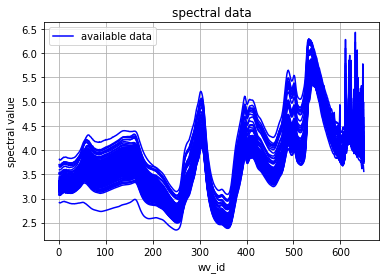

In [4]:
# visualize data

plt.plot(wv_range,x_initial[0], c = "blue", label = "available data")
plt.plot(wv_range,x_initial.T, c = "blue")
plt.xlabel("wv_id")
plt.ylabel("spectral value")
plt.title("spectral data")
plt.legend()
plt.grid()
plt.show()

# <span style="color:#00BDFF">pca exploratory analysis</span>

proportion of variance first pc's:  [0.76 0.16 0.02 0.01 0.01 0.   0.   0.   0.   0.  ]


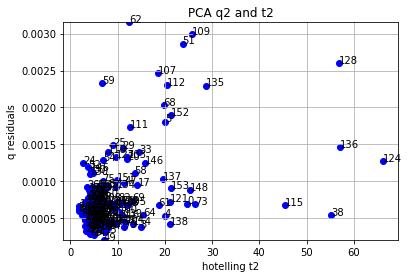

In [6]:
# initial pca for exploratory analysis


pca_mu = x_initial.mean(axis=0)

X_c = x_initial - pca_mu
X_c_t = np.ascontiguousarray(X_c.transpose())
cov_X = X_c_t.dot(X_c)/X_c.shape[0]
svd_cov_X = np.linalg.svd(cov_X)


chosen_pc = 10

pc_loadings = svd_cov_X[0][:,0:chosen_pc]
tscores = (x_initial - pca_mu).dot(pc_loadings)
x_all_predicted = tscores.dot(pc_loadings.T) + pca_mu

q_residuals = np.mean(np.power(x_initial - x_all_predicted,2),axis=1)
hotelling_t2 = np.diag(tscores.dot(np.diag(1/svd_cov_X[1][0:chosen_pc])).dot(tscores.T))

print("proportion of variance first pc's: ",np.round(svd_cov_X[1]/np.sum(svd_cov_X[1]),2)[0:chosen_pc])


plt.scatter(hotelling_t2,q_residuals,c="blue")
for ii in range(hotelling_t2.shape[0]):
    plt.text(hotelling_t2[ii],q_residuals[ii], str(ii))
plt.grid()
plt.ylim(np.amin(q_residuals),np.amax(q_residuals))
plt.xlabel("hotelling t2")
plt.ylabel("q residuals")
plt.title("PCA q2 and t2")
plt.show()



In [54]:
# --- observations to carry for unsupervised sample selection if necessary

drop_obs = [] #here we don't drop any observation
keep_obs = [ii for ii in range(x_initial.shape[0]) if ii not in drop_obs]

x_all = np.delete(x_initial, obj = drop_obs, axis=0)
samples_all_id = samples_initial_id[keep_obs]

print("done")
x_all.shape


done


(155, 650)

# <span style="color:#00BDFF">unsupervised sample selection</span>

In [33]:
# --- determine optimal complexity

d = 7 # number of lv for the future objective pls model. Discussed in publication (upcoming)
n_sel = 12*d+1
a = d + 5 # number of pc 

print("n: ", n_sel)

n:  85


In [29]:
# --- select samples



my_sample_selection = sample_selection(x_all, ncp = a)  
my_sample_selection.get_xcal_pca_scores()

selected_sets = {}


selected_sets["ks_sample"] = my_sample_selection.kennard_stone(Nout=n_sel, fixed_samples=None, use_pca_scores=True, distance_metric='mahalanobis')

selected_sets["duplex_sample"] = my_sample_selection.duplex(Nout = n_sel, use_pca_scores=True, distance_metric='mahalanobis')

selected_sets["puch_sample"] = my_sample_selection.puchwein(Nout = n_sel, factor_k=0.0001, use_pca_scores=True, distance_metric='mahalanobis')

selected_sets["clus_sample"] = my_sample_selection.clustering(Nout = n_sel , use_pca_scores=True, distance_metric='euclidean', linkage = "complete")

selected_sets["simplisma"] = my_sample_selection.simplisma(Nout = n_sel, fixed_samples=None, alpha_factor=0.01, center=True)

selected_sets["successive_projections"] = my_sample_selection.successive_projections(Nout = n_sel, fixed_samples=None, center=True)

print("done")

done


# <span style="color:#00BDFF">evaluate selected samples: eigenvectors and eigenvalues</span>

In [30]:
# --- select one sample set for cal and eigenevaluation



svd_methods = {}



for method_name in selected_sets.keys():    


    selected_cal_set = selected_sets[method_name].copy()

    # --- evaluate selected cal set: S matrix eigen decomp

    x_selected = x_all[selected_cal_set==1,:]
    Xs_c = x_selected - x_selected.mean(axis=0)
    Xs_c_t = np.ascontiguousarray(Xs_c.transpose())
    cov_Xs = Xs_c_t.dot(Xs_c)/Xs_c.shape[0]
    svd_selected = np.linalg.svd(cov_Xs)
    
    svd_methods[method_name] = svd_selected
    
print("done")



done


determinant eigenvectors: 

ks_sample :  0.807
duplex_sample :  0.248
puch_sample :  0.881
clus_sample :  0.662
simplisma :  0.741
successive_projections :  0.324


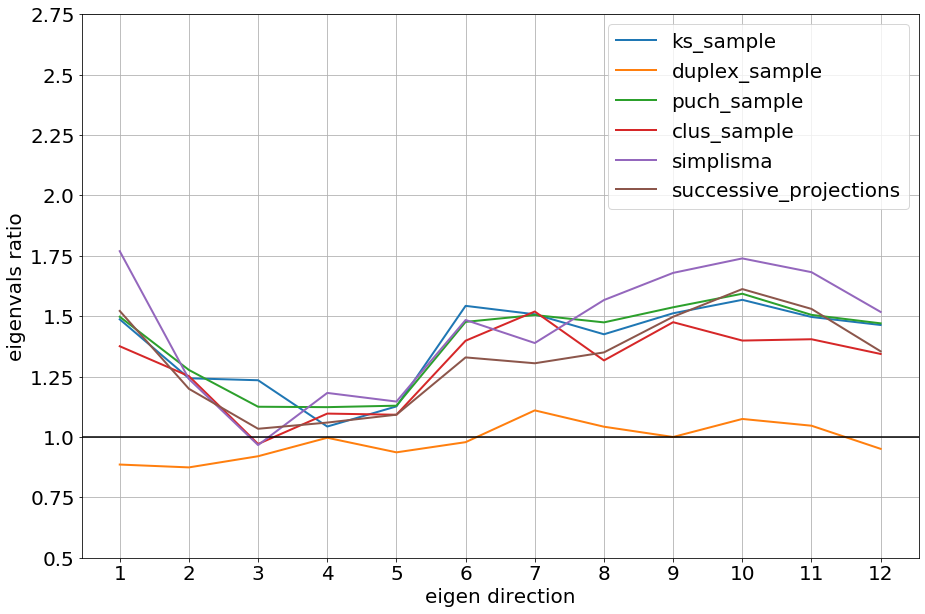

In [31]:
# --- visualize comparison svd: select a set with largest determinant and eigenvalues above and close to 1




X_c = x_all - x_all.mean(axis=0)
X_c_t = np.ascontiguousarray(X_c.transpose())
cov_X = X_c_t.dot(X_c)/X_c.shape[0]
svd_cov_X = np.linalg.svd(cov_X)

# eigenvect comparison

print("determinant eigenvectors: \n")

for method_name in svd_methods.keys():
    
    svd_selected = svd_methods[method_name]
    eigen_vals_ratio = svd_selected[1][0:a]/svd_cov_X[1][0:a]
    eigen_vect_comparison = svd_selected[0][:,0:a].T.dot(svd_cov_X[0][:,0:a])
    eigen_vect_criterion = np.abs(np.linalg.det(eigen_vect_comparison))
    print(method_name,": ",np.round(eigen_vect_criterion,3))
    
    
# eigenval comparison

font_size = 20
yticks = np.arange(0.5,3, 0.25)
xticks = np.arange(1,a+1)


fig, ax = plt.subplots(figsize = (15,10))

for method_name in svd_methods.keys():
    
    svd_selected = svd_methods[method_name]
    eigen_vals_ratio = svd_selected[1][0:a]/svd_cov_X[1][0:a]
    ax.plot(xticks,eigen_vals_ratio, Linewidth = 2, label = method_name)
    
ax.grid()
ax.axhline(y=1, c = "black")
ax.set_xlabel("eigen direction", fontsize = font_size)
ax.set_xticks(xticks)
ax.set_xticklabels(labels = xticks, fontsize = font_size)
ax.set_ylabel("eigenvals ratio", fontsize = font_size)
ax.set_yticks(yticks)
ax.set_yticklabels(labels = yticks, fontsize = font_size)
ax.legend(fontsize = font_size)
plt.show()

# <span style="color:#00BDFF">output: deliver a set of samples</span>

In [56]:
choose_set = "puch_sample"
selected_sets[choose_set]
samples_all_id[selected_sets[choose_set]==1]

0        sample_cal_0
3        sample_cal_3
5        sample_cal_5
7        sample_cal_7
8        sample_cal_8
            ...      
148    sample_cal_148
151    sample_cal_151
152    sample_cal_152
153    sample_cal_153
154    sample_cal_154
Name: sample_id, Length: 85, dtype: object